# Logistic Regression Lab

## Logistic Regression Documentation

from http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py

## Lab Instruction

### Part 1: Importing the Dataset

Import "Logistic Regression Lab.csv". 

In [3]:
import pandas as pd

In [14]:
df = pd.read_csv("Logistic Regression Lab.csv", index_col=0)

### Part 2: Preprocessing

Preprocess the dataset. Try to understand the techniques you use.

In [15]:
df.head()

,Foundation,1stFlrSF,KitchenQual,Fireplaces,HeatingQC,FullBath,BsmtQual,OpenPorchSF,GarageYrBlt,ExterQual,...,BsmtFinType1,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,Fence,SalePrice
0,PConc,856,Gd,0,Ex,2,Gd,61,2003.0,Gd,...,GLQ,2003,548,8,2,1710,2003,65.0,NaN,High
1,CBlock,1262,TA,1,Ex,2,Gd,0,1976.0,TA,...,ALQ,1976,460,6,2,1262,1976,80.0,NaN,Medium
2,PConc,920,Gd,1,Ex,2,Gd,42,2001.0,Gd,...,GLQ,2001,608,6,2,1786,2002,68.0,NaN,High
3,BrkTil,961,Gd,1,Gd,1,TA,35,1998.0,TA,...,ALQ,1915,642,7,3,1717,1970,60.0,NaN,Medium
4,PConc,1145,Gd,1,Ex,2,Gd,84,2000.0,Gd,...,GLQ,2000,836,9,3,2198,2000,84.0,NaN,High


In [16]:
df.shape

(1460, 21)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 21 columns):
Foundation      1460 non-null object
1stFlrSF        1460 non-null int64
KitchenQual     1460 non-null object
Fireplaces      1460 non-null int64
HeatingQC       1460 non-null object
FullBath        1460 non-null int64
BsmtQual        1423 non-null object
OpenPorchSF     1460 non-null int64
GarageYrBlt     1379 non-null float64
ExterQual       1460 non-null object
OverallQual     1460 non-null int64
BsmtFinType1    1423 non-null object
YearBuilt       1460 non-null int64
GarageArea      1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
GarageCars      1460 non-null int64
GrLivArea       1460 non-null int64
YearRemodAdd    1460 non-null int64
LotFrontage     1201 non-null float64
Fence           281 non-null object
SalePrice       1460 non-null object
dtypes: float64(2), int64(11), object(8)
memory usage: 250.9+ KB


In [18]:
df.isna().mean()[df.isna().mean() > 0]

BsmtQual        0.025342
GarageYrBlt     0.055479
BsmtFinType1    0.025342
LotFrontage     0.177397
Fence           0.807534
dtype: float64

In [19]:
keep_ind = df.isna().mean()[df.isna().mean() < 0.5].index

In [21]:
df2 = df.loc[:,keep_ind].copy()

In [23]:
df2.isna().mean()[df2.isna().mean() > 0]

BsmtQual        0.025342
GarageYrBlt     0.055479
BsmtFinType1    0.025342
LotFrontage     0.177397
dtype: float64

In [25]:
with pd.option_context("display.max_rows",None,"display.max_columns", None):
    display(df2.describe())

,1stFlrSF,Fireplaces,FullBath,OpenPorchSF,GarageYrBlt,OverallQual,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,1162.626712,0.613014,1.565068,46.660274,1978.506164,6.099315,1971.267808,472.980137,6.517808,1.767123,1515.463699,1984.865753,70.049958
std,386.587738,0.644666,0.550916,66.256028,24.689725,1.382997,30.202904,213.804841,1.625393,0.747315,525.480383,20.645407,24.284752
min,334.000000,0.000000,0.000000,0.000000,1900.000000,1.000000,1872.000000,0.000000,2.000000,0.000000,334.000000,1950.000000,21.000000
25%,882.000000,0.000000,1.000000,0.000000,1961.000000,5.000000,1954.000000,334.500000,5.000000,1.000000,1129.500000,1967.000000,59.000000
50%,1087.000000,1.000000,2.000000,25.000000,1980.000000,6.000000,1973.000000,480.000000,6.000000,2.000000,1464.000000,1994.000000,69.000000
75%,1391.250000,1.000000,2.000000,68.000000,2002.000000,7.000000,2000.000000,576.000000,7.000000,2.000000,1776.750000,2004.000000,80.000000
max,4692.000000,3.000000,3.000000,547.000000,2010.000000,10.000000,2010.000000,1418.000000,14.000000,4.000000,5642.000000,2010.000000,313.000000


In [33]:
df2.dropna(inplace=True)

In [38]:
y = df2.pop("SalePrice")

In [42]:
print(y.head())
print(y.unique())

0      High
1    Medium
2      High
3    Medium
4      High
Name: SalePrice, dtype: object
['High' 'Medium' 'Low']


In [45]:
y.replace(['High','Medium','Low'],[2,1,0],inplace=True)
print(y.head())

0    2
1    1
2    2
3    1
4    2
Name: SalePrice, dtype: int64


In [46]:
#get dummy
df3 = pd.concat([pd.get_dummies(df2.select_dtypes(include="object")),
                df2.select_dtypes(include=['float64','int64'])],
                axis = 1)

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1459
Data columns (total 41 columns):
Foundation_BrkTil    1103 non-null uint8
Foundation_CBlock    1103 non-null uint8
Foundation_PConc     1103 non-null uint8
Foundation_Stone     1103 non-null uint8
Foundation_Wood      1103 non-null uint8
KitchenQual_Ex       1103 non-null uint8
KitchenQual_Fa       1103 non-null uint8
KitchenQual_Gd       1103 non-null uint8
KitchenQual_TA       1103 non-null uint8
HeatingQC_Ex         1103 non-null uint8
HeatingQC_Fa         1103 non-null uint8
HeatingQC_Gd         1103 non-null uint8
HeatingQC_Po         1103 non-null uint8
HeatingQC_TA         1103 non-null uint8
BsmtQual_Ex          1103 non-null uint8
BsmtQual_Fa          1103 non-null uint8
BsmtQual_Gd          1103 non-null uint8
BsmtQual_TA          1103 non-null uint8
ExterQual_Ex         1103 non-null uint8
ExterQual_Fa         1103 non-null uint8
ExterQual_Gd         1103 non-null uint8
ExterQual_TA         1103 non-nu

In [48]:
with pd.option_context("display.max_rows",None,"display.max_columns", None):
    display(df3.describe())

,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,1stFlrSF,Fireplaces,FullBath,OpenPorchSF,GarageYrBlt,OverallQual,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage
count,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,0.110607,0.404352,0.477788,0.005440,0.001813,0.083409,0.019039,0.418858,0.478694,0.545784,0.024479,0.158658,0.000907,0.270172,0.103354,0.029012,0.427017,0.440617,0.042611,0.006346,0.364461,0.586582,0.146872,0.095195,0.297371,0.050771,0.095195,0.314597,1174.398912,0.609248,1.580236,47.300997,1978.780598,6.256573,1972.675431,504.497733,6.568450,1.882140,1535.593835,1986.072529,70.786945
std,0.313788,0.490989,0.499733,0.073587,0.042563,0.276625,0.136724,0.493596,0.499772,0.498125,0.154600,0.365523,0.030110,0.444250,0.304559,0.167916,0.494869,0.496686,0.202070,0.079447,0.481497,0.492670,0.354139,0.293617,0.457308,0.219629,0.293617,0.464566,387.790496,0.632302,0.549417,65.108203,25.937502,1.369353,31.198007,192.157480,1.581019,0.657691,524.708556,20.917568,24.473270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,1900.000000,2.000000,1880.000000,160.000000,3.000000,1.000000,438.000000,1950.000000,21.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,894.000000,0.000000,1.000000,0.000000,1960.000000,5.000000,1954.000000,360.000000,5.000000,1.000000,1165.500000,1967.500000,60.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1098.000000,1.000000,2.000000,28.000000,1983.000000,6.000000,1976.000000,484.000000,6.000000,2.000000,1481.000000,1996.000000,70.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1414.000000,1.000000,2.000000,69.000000,2003.000000,7.000000,2003.000000,602.000000,7.000000,2.000000,1779.000000,2005.000000,80.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4692.000000,3.000000,3.000000,547.000000,2010.000000,10.000000,2010.000000,1418.000000,12.000000,4.000000,5642.000000,2010.000000,313.000000


In [49]:
with pd.option_context("display.max_rows",None,"display.max_columns", None):
    display(df3.head())

,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,1stFlrSF,Fireplaces,FullBath,OpenPorchSF,GarageYrBlt,OverallQual,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage
0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,856,0,2,61,2003.0,7,2003,548,8,2,1710,2003,65.0
1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1262,1,2,0,1976.0,6,1976,460,6,2,1262,1976,80.0
2,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,920,1,2,42,2001.0,7,2001,608,6,2,1786,2002,68.0
3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,961,1,1,35,1998.0,7,1915,642,7,3,1717,1970,60.0
4,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1145,1,2,84,2000.0,8,2000,836,9,3,2198,2000,84.0


In [50]:
x = df3;

### Part 3: Perform Logistic Regression 

You can import a Logistic Regression Classifier by using the following codes:

In [89]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

x = df3;
y = y;

# Split the data into training/testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.60, random_state=42)

lr = linear_model.LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

#Use trained model to predict training set and calculate accuracy score
yhat_train = lr.predict(x_train)
acc_train = accuracy_score(y_train, yhat_train)

print("accuracy score for train dataset: {} %".format('%0.2f'%(acc_train*100)))
print("confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train))


#Use trained model to predict testing set and calculate accuracy score
yhat_test = lr.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)

print("\naccuracy score for test dataset: {} %".format('%0.2f'%(acc_test*100)))
print("confusion matrix for test dataset: \n")
print(confusion_matrix(y_test, yhat_test))

accuracy score for train dataset: 84.35 %
confusion matrix for train dataset: 

[[118  14   1]
 [ 22  84  28]
 [  0   4 170]]

accuracy score for test dataset: 73.87 %
confusion matrix for test dataset: 

[[167  32  10]
 [ 58 110  58]
 [  2  13 212]]


You can look at the parameters and functions of Logistic Regression at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [90]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro','recall_macro'] 
scores = cross_validate(lr, x_train, y_train,scoring = scoring,cv = 5, return_train_score=True)
pd.DataFrame(scores).mean()

fit_time                 0.014555
score_time               0.000597
test_precision_macro     0.787478
train_precision_macro    0.842095
test_recall_macro        0.779187
train_recall_macro       0.831129
dtype: float64

## Part 4: Analyze the result

After you perform Logistic Regression, answer the following question.

1. If you change your preprosessing method, can you improve the model?
2. If you change your parameters setting, can you improve the model?

In [91]:
print(yhat_test[:5]) 

[0 1 2 0 0]


In [92]:
y_pred_proba = lr.predict_proba(x_test)

In [93]:
print(y_pred_proba[:5]) # prob of each class (0,1,2)
# ordering columns by alphabetical order!

[[5.55198805e-01 4.42275940e-01 2.52525526e-03]
 [1.72718916e-01 6.98380828e-01 1.28900256e-01]
 [3.89802140e-04 1.67214068e-01 8.32396130e-01]
 [7.17796493e-01 2.82016418e-01 1.87089813e-04]
 [6.17524756e-01 3.82244084e-01 2.31160173e-04]]


### Trial more with other option

In [94]:
lr2 = linear_model.LogisticRegression(solver="newton-cg", max_iter=5000, multi_class="multinomial",random_state=42)
lr2.fit(x_train, y_train)

#Use trained model to predict training set and calculate accuracy score
yhat_train = lr2.predict(x_train)
acc_train = accuracy_score(y_train, yhat_train)

print("accuracy score for train dataset: {} %".format('%0.2f'%(acc_train*100)))
print("confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train))


#Use trained model to predict testing set and calculate accuracy score
yhat_test = lr2.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)

print("\naccuracy score for test dataset: {} %".format('%0.2f'%(acc_test*100)))
print("confusion matrix for test dataset: \n")
print(confusion_matrix(y_test, yhat_test))

C:\Users\pathairs.CEMENTHAI\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pathairs.CEMENTHAI\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


accuracy score for train dataset: 88.44 %
confusion matrix for train dataset: 

[[119  14   0]
 [ 15 105  14]
 [  0   8 166]]

accuracy score for test dataset: 77.79 %
confusion matrix for test dataset: 

[[160  46   3]
 [ 38 145  43]
 [  0  17 210]]


In [95]:
lr3 = linear_model.LogisticRegression(solver="lbfgs", max_iter=1000, multi_class="multinomial",random_state=42)
lr3.fit(x_train, y_train)

#Use trained model to predict training set and calculate accuracy score
yhat_train = lr3.predict(x_train)
acc_train = accuracy_score(y_train, yhat_train)

print("accuracy score for train dataset: {} %".format('%0.2f'%(acc_train*100)))
print("confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train))


#Use trained model to predict testing set and calculate accuracy score
yhat_test = lr3.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)

print("\naccuracy score for test dataset: {} %".format('%0.2f'%(acc_test*100)))
print("confusion matrix for test dataset: \n")
print(confusion_matrix(y_test, yhat_test))

accuracy score for train dataset: 82.09 %
confusion matrix for train dataset: 

[[113  17   3]
 [ 23  91  20]
 [  0  16 158]]

accuracy score for test dataset: 73.87 %
confusion matrix for test dataset: 

[[154  46   9]
 [ 49 126  51]
 [  0  18 209]]


In [96]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
lr2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
lr3

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Using grid search for selecting the best model

in case, you need to analyze the failure case data to find the root cause, the logistic regression aren't the proper tools. <br>
if you need the more informative data, may be decision tree might be suitable one.

### initial decision tree

In [104]:
from sklearn import decomposition, datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix


# Create decision tree object and train the model using the training sets
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train,y_train)

#Use trained model to predict training set and calculate accuracy score
yhat_train = clf.predict(x_train)
acc_train = accuracy_score(y_train, yhat_train)

print("accuracy score for train dataset: {} %".format('%0.2f'%(acc_train*100)))
print("confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train))


#Use trained model to predict testing set and calculate accuracy score
yhat_test = clf.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)

print("\naccuracy score for test dataset: {} %".format('%0.2f'%(acc_test*100)))
print("confusion matrix for test dataset: \n")
print(confusion_matrix(y_test, yhat_test))

accuracy score for train dataset: 100.00 %
confusion matrix for train dataset: 

[[133   0   0]
 [  0 134   0]
 [  0   0 174]]

accuracy score for test dataset: 72.05 %
confusion matrix for test dataset: 

[[155  48   6]
 [ 51 126  49]
 [  2  29 196]]


### Comparison with decision tree

In [100]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro','recall_macro'] 
scores = cross_validate(clf, x_train, y_train,scoring = scoring,cv = 5, return_train_score=True)
pd.DataFrame(scores).mean()

fit_time                 0.003792
score_time               0.001402
test_precision_macro     0.748644
train_precision_macro    1.000000
test_recall_macro        0.740303
train_recall_macro       1.000000
dtype: float64

In [101]:
from sklearn.model_selection import cross_validate

scoring = ['precision_macro','recall_macro'] 
scores = cross_validate(lr2, x_train, y_train,scoring = scoring,cv = 5, return_train_score=True)
pd.DataFrame(scores).mean()

C:\Users\pathairs.CEMENTHAI\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pathairs.CEMENTHAI\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pathairs.CEMENTHAI\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pathairs.CEMENTHAI\AppData\Roaming\Python\Python36\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\pathairs.CEMENTHAI\AppD

fit_time                 1.266733
score_time               0.000998
test_precision_macro     0.817388
train_precision_macro    0.878757
test_recall_macro        0.817973
train_recall_macro       0.877131
dtype: float64

0    342
1    360
2    401
Name: SalePrice, dtype: int64


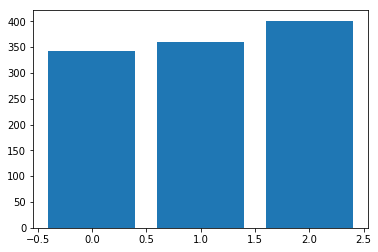

In [136]:
import matplotlib.pyplot as plt
plt.bar(x=[0,1,2],height=y.value_counts().sort_values());
print(y.value_counts().sort_values())

การทำ cross validation นั้นควรใช้ data ทั้งก้อนพอได้ model มาแล้วค่อยใช้ validation set สำหรับการทดสอบ final error ทีหลัง